# Airbnb Market Trends

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
last_review = pd.read_csv(r'C:\Users\nene0\OneDrive\바탕 화면\Python Learning\Datacamp\6_Airbnb\airbnb_last_review.tsv',
                     delimiter='\t', parse_dates=['last_review']) # tab separated values

price = pd.read_csv(r'C:\Users\nene0\OneDrive\바탕 화면\Python Learning\Datacamp\6_Airbnb\airbnb_price.csv')

room = pd.read_excel(r'C:\Users\nene0\OneDrive\바탕 화면\Python Learning\Datacamp\6_Airbnb\airbnb_room_type.xlsx')

In [81]:
last_review

,listing_id,host_name,last_review
0,2595,Jennifer,2019-05-21
1,3831,LisaRoxanne,2019-07-05
2,5099,Chris,2019-06-22
3,5178,Shunichi,2019-06-24
4,5238,Ben,2019-06-09
...,...,...,...
25204,36425863,Rusaa,2019-07-07
25205,36427429,H Ai,2019-07-07
25206,36438336,Ben,2019-07-07
25207,36442252,Blaine,2019-07-07


In [82]:
price

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"
...,...,...,...
25204,36425863,129 dollars,"Manhattan, Upper East Side"
25205,36427429,45 dollars,"Queens, Flushing"
25206,36438336,235 dollars,"Staten Island, Great Kills"
25207,36442252,100 dollars,"Bronx, Mott Haven"


In [83]:
room

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt
...,...,...,...
25204,36425863,Lovely Privet Bedroom with Privet Restroom,PRIVATE ROOM
25205,36427429,No.2 with queen size bed,PRIVATE ROOM
25206,36438336,Seas The Moment,Private room
25207,36442252,1B-1B apartment near by Metro,Entire home/apt


In [84]:
airbnb = price.merge(room, on='listing_id').merge(last_review, on='listing_id')
airbnb.head()

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
0,2595,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt,Jennifer,2019-05-21
1,3831,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,2019-07-05
2,5099,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,2019-06-22
3,5178,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,2019-06-24
4,5238,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,2019-06-09


In [85]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   listing_id   25209 non-null  int64         
 1   price        25209 non-null  object        
 2   nbhood_full  25209 non-null  object        
 3   description  25199 non-null  object        
 4   room_type    25209 non-null  object        
 5   host_name    25201 non-null  object        
 6   last_review  25209 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.3+ MB


In [86]:
# What are the dates of the earliest and most recent reviews?
# Store these values as two separate variables with your preferred names.

earliest_review = airbnb['last_review'].min()
latest_review= airbnb['last_review'].max()

print(f"The earliest date that the review was written was {earliest_review}.")
print(f"The latest date that the review was written was {latest_review}.")

The earliest date that the review was written was 2019-01-01 00:00:00.
The latest date that the review was written was 2019-07-09 00:00:00.


In [87]:
# How many of the listings are private rooms? Save this into any variable.

airbnb['room_type'] = airbnb['room_type'].str.title()

private_rooms = airbnb[airbnb['room_type']=='Private Room'].shape[0]

print(f"{private_rooms} are listings of private rooms in the Airbnb.")

11356 are listings of private rooms in the Airbnb.


In [88]:
# What is the average listing price?
# Round to the nearest two decimal places and save into a variable.

# Change the price data type:
airbnb['price'] = airbnb['price'].str.replace(' dollars', '')
airbnb['price'] = airbnb['price'].astype('int64')

# Average listing price:
avg_price = round(airbnb['price'].mean(), 2)

print(f"The average listing price in Airbnb is {avg_price}.")

The average listing price in Airbnb is 141.78.


In [89]:
# Combine the new variables into one DataFrame called review_dates with four columns in the following order:
# first_reviewed, last_reviewed, nb_private_rooms, and avg_price.
# The DataFrame should only contain one row of values.

review_dates = pd.DataFrame({'first_reviewed':earliest_review,
                             'last_reviewed': latest_review,
                             'nb_private_rooms':private_rooms,
                             'avg_price':avg_price}, index=[0])

review_dates

,first_reviewed,last_reviewed,nb_private_rooms,avg_price
0,2019-01-01,2019-07-09,11356,141.78


## Explore Data

In [90]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   listing_id   25209 non-null  int64         
 1   price        25209 non-null  int64         
 2   nbhood_full  25209 non-null  object        
 3   description  25199 non-null  object        
 4   room_type    25209 non-null  object        
 5   host_name    25201 non-null  object        
 6   last_review  25209 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.3+ MB


### Filling Missing Values

In [91]:
airbnb[airbnb['host_name'].isna()]

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
263,100184,50,"Queens, Queens Village",Bienvenue,Private Room,NaN,2019-07-08
3040,4183989,86,"Manhattan, Harlem",SPRING in the City!! Zen-Style Tranquil Bedroom,Private Room,NaN,2019-05-23
4039,6292866,85,"Brooklyn, East Flatbush",Modern Quiet Gem Near All,Entire Home/Apt,NaN,2019-06-19
4269,6786181,100,"Brooklyn, East Flatbush",R&S Modern Spacious Hideaway,Entire Home/Apt,NaN,2019-06-19
6338,12113879,220,"Manhattan, Chelsea","Sunny, Large West Village 1 BR Near Everything",Entire Home/Apt,NaN,2019-07-02
8060,15648096,75,"Bronx, Highbridge",Spacious 2 bedroom close to Manhattan,Entire Home/Apt,NaN,2019-07-07
12128,21867710,120,"Manhattan, Hell's Kitchen",Amazing room in the centre on Manhatten! Welcome!,Private Room,NaN,2019-01-01
12164,21901156,120,"Manhattan, Hell's Kitchen",Best Deal! Lovely place in Manhattan! Time Squ...,Private Room,NaN,2019-01-01


In [92]:
airbnb['host_name'] = airbnb['host_name'].fillna('Unknown')

In [93]:
airbnb.describe()

,listing_id,price,last_review
count,2.520900e+04,25209.000000,25209
mean,2.068922e+07,141.777936,2019-05-30 07:58:41.171010560
min,2.595000e+03,0.000000,2019-01-01 00:00:00
25%,1.202273e+07,69.000000,2019-05-23 00:00:00
50%,2.234391e+07,105.000000,2019-06-18 00:00:00
75%,3.037669e+07,175.000000,2019-06-29 00:00:00
max,3.645581e+07,7500.000000,2019-07-09 00:00:00
std,1.102928e+07,147.349137,NaN


### Outliers

<Axes: >

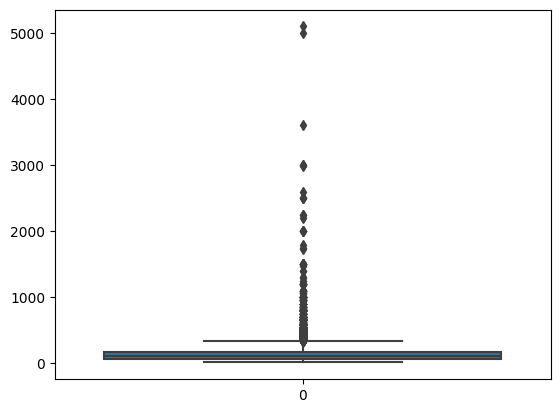

In [102]:
sns.boxplot(airbnb['price'])

In [96]:
airbnb[airbnb['price']==0]

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
10861,20333471,0,"Bronx, East Morrisania",‚òÖHostel Style Room | Ideal Traveling Buddies‚òÖ,Private Room,Anisha,2019-06-24
10958,20523843,0,"Brooklyn, Bushwick","MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Private Room,Martial Loft,2019-05-18
11023,20639628,0,"Brooklyn, Bedford-Stuyvesant",Spacious comfortable master bedroom with nice ...,Private Room,Adeyemi,2019-06-15
11024,20639792,0,"Brooklyn, Bedford-Stuyvesant",Contemporary bedroom in brownstone with nice view,Private Room,Adeyemi,2019-06-21
11025,20639914,0,"Brooklyn, Bedford-Stuyvesant",Cozy yet spacious private brownstone bedroom,Private Room,Adeyemi,2019-06-23
11577,21291569,0,"Brooklyn, Bushwick",Coliving in Brooklyn! Modern design / Shared room,Shared Room,Sergii,2019-06-22
11589,21304320,0,"Brooklyn, Bushwick",Best Coliving space ever! Shared room.,Shared Room,Sergii,2019-05-24


In [97]:
airbnb.drop(index=airbnb[(airbnb['price']==0)|(airbnb['price']==7500)].index, inplace=True)
airbnb.reset_index(drop=True, inplace=True)

In [98]:
airbnb[airbnb['price']==airbnb['price'].min()]

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
9686,18490141,10,"Queens, Jamaica",IT'S SIMPLY CONVENIENT!,Entire Home/Apt,Maria,2019-06-12
12128,21869057,10,"Brooklyn, Greenpoint",Spacious 2-bedroom Apt in Heart of Greenpoint,Entire Home/Apt,Vishanti & Jeremy,2019-07-01
13887,24412104,10,"Manhattan, Kips Bay",Cozy feel at home studio,Private Room,Maureen,2019-06-30
15044,26235873,10,"Queens, Jamaica",Voted #1 Airbnb In NYC,Entire Home/Apt,Maria,2019-07-06
16636,28270998,10,"Brooklyn, Bedford-Stuyvesant","Charming, bright and brand new Bed-Stuy home",Entire Home/Apt,Caterina,2019-07-02
24798,35642891,10,"Brooklyn, Bushwick",Beautiful room in Bushwick,Private Room,Julio,2019-06-18


In [100]:
airbnb[airbnb['price']==airbnb['price'].max()]

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
22078,33397385,5100,"Manhattan, Midtown",Midtown Manhattan great location (Gramacy park),Entire Home/Apt,Debra,2019-06-22


In [101]:
print(f"The maximum price in the listing is {airbnb['price'].max()} and minimum price is {airbnb['price'].min()}.")

The maximum price in the listing is 5100 and minimum price is 10.


<Axes: >

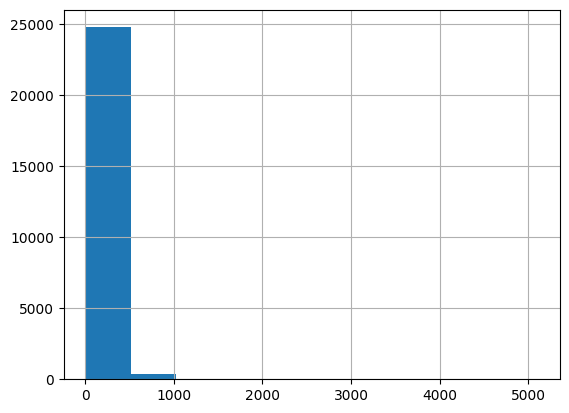

In [104]:
airbnb['price'].hist()

In the dataset of Airbnb listings, there are some prices that are way higher or lower than the rest. For example, there's one listing priced at $7,500, which is super expensive, and another at $0, which seems too low. After removing these extreme values, we're left with a more typical price range. However, since there's still a listing at $5,100, the overall distribution of prices remains skewed to the right.

### Data Visualization

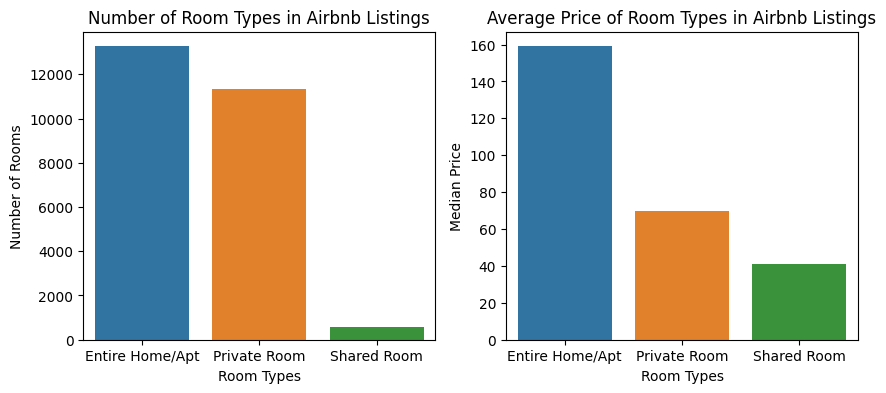

In [105]:
# What is the most common room type and what is the median price of those rooms?

rooms_agg = airbnb.groupby('room_type')[['price','listing_id']].agg({'price':'median','listing_id':'count'}).reset_index()
rooms_agg.columns = ['room_type', 'med_price', 'num_rooms']

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.barplot(rooms_agg, x='room_type', y='num_rooms', ax=axes[0])
axes[0].set_xlabel('Room Types')
axes[0].set_ylabel('Number of Rooms')
axes[0].set_title('Number of Room Types in Airbnb Listings')

sns.barplot(rooms_agg, x='room_type', y='med_price', ax=axes[1])
axes[1].set_xlabel('Room Types')
axes[1].set_ylabel('Median Price')
axes[1].set_title('Average Price of Room Types in Airbnb Listings')

plt.show()

The most popular type of listing on Airbnb is 'Entire Home/Apt'. The median price for this type of listing is approximately $160. For 'Private Room' listings, the median price is around $70, and for 'Shared Room' listings, it's about $45.

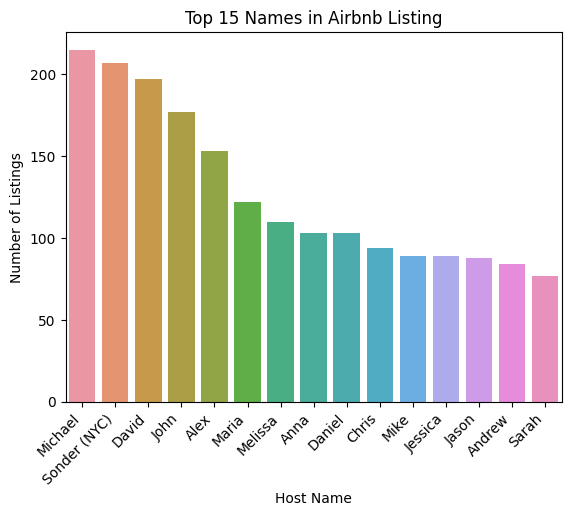

In [106]:
# What are the top 15 'host_name' in the listings?

host_agg = airbnb.groupby('host_name')['listing_id'].count().sort_values(ascending=False).reset_index()[:15]

sns.barplot(data=host_agg, x='host_name', y='listing_id')
plt.xlabel('Host Name')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Listings')
plt.title('Top 15 Names in Airbnb Listing')

plt.show()

The most frequently occurring host names in the Airbnb listings are 'Michael', 'Sonder (NYC)', 'David', 'John', and 'Alex', each having more than 100 listings associated with them. If we had data on the last names of the hosts, we could identify which hosts have multiple listings.

In [26]:
neighborhood = airbnb['nbhood_full'].str.split(', ', expand=True)
neighborhood.drop(columns=2, inplace=True)
neighborhood.columns = ['nbhoo_1', 'nbhood_2']

neighborhood

,nbhoo_1,nbhood_2
0,Manhattan,Midtown
1,Brooklyn,Clinton Hill
2,Manhattan,Murray Hill
3,Manhattan,Hell's Kitchen
4,Manhattan,Chinatown
...,...,...
25204,Manhattan,Upper East Side
25205,Queens,Flushing
25206,Staten Island,Great Kills
25207,Bronx,Mott Haven


In [30]:
airbnb_new = pd.concat([airbnb,neighborhood], axis=1)
airbnb_new.drop(columns='nbhood_full', inplace=True)

airbnb_new.head()

,listing_id,price,description,room_type,host_name,last_review,nbhoo_1,nbhood_2
0,2595,225,Skylit Midtown Castle,Entire Home/Apt,Jennifer,2019-05-21,Manhattan,Midtown
1,3831,89,Cozy Entire Floor of Brownstone,Entire Home/Apt,LisaRoxanne,2019-07-05,Brooklyn,Clinton Hill
2,5099,200,Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt,Chris,2019-06-22,Manhattan,Murray Hill
3,5178,79,Large Furnished Room Near B'way,Private Room,Shunichi,2019-06-24,Manhattan,Hell's Kitchen
4,5238,150,Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt,Ben,2019-06-09,Manhattan,Chinatown


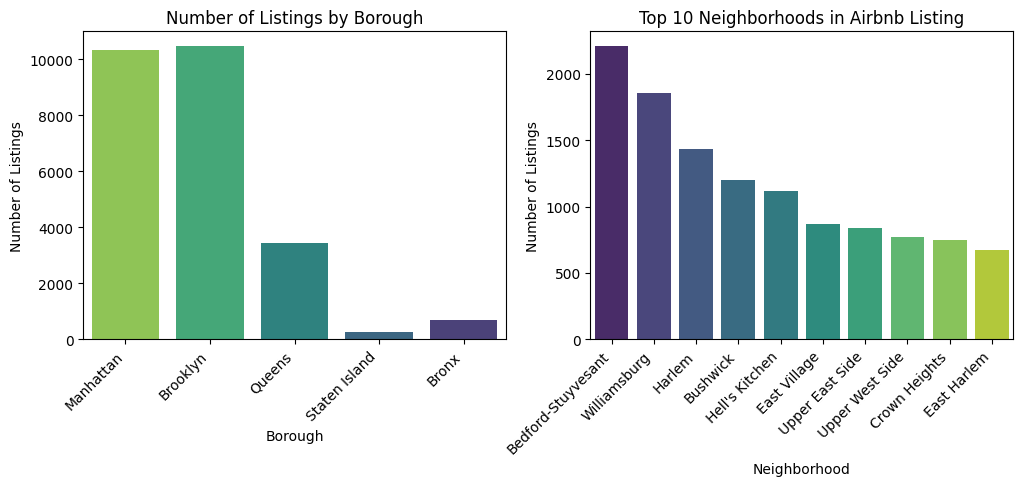

In [107]:
nbhood_agg = airbnb_new['nbhood_2'].value_counts().reset_index()[:10]

fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.countplot(airbnb_new, x='nbhoo_1', ax=axes[0], palette='viridis_r')
axes[0].set_xlabel('Borough')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_ylabel('Number of Listings')
axes[0].set_title('Number of Listings by Borough')

sns.barplot(nbhood_agg, x='nbhood_2', y='count', ax=axes[1], palette='viridis')
axes[1].set_xlabel('Neighborhood')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_ylabel('Number of Listings')
axes[1].set_title('Top 10 Neighborhoods in Airbnb Listing')

plt.show()

The majority of listings are situated in 'Brooklyn' and 'Manhatten, while the fewest are found in 'Staten Island'. Upon closer examination of neighborhoods, 'Bedford-Stuyvesant' in Brooklyn, New York, emerges as the area with the highest concentration of listings.